# Herkenning van objecten met CNNs

Stijn Oomes

woensdag 23 maart 2022


## 1. Residual Neural Network

Een ResNet is een bekend AI neurale netwerk. Bij normale netwerken gaat data van de ene laag door naar de andere laag. De output van de ene is de input van de laag erna. Bij residual NN is dit niet zo. Deze maakt gebruik van skiptechnieken. Ookal zou een model honderden lagen hebben, Dit zorgt er gewoon voor dat het  trainen van een model effectiever is. Zo voorkomt het de vanishing gradient probleem (gradient zo klein dat gewichten niet worden geupdate)


### 1.1 Importeer libraries

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread

from sklearn.datasets import load_sample_image
import tensorflow as tf
from tensorflow import keras

### 1.2 Laad en toon foto's

(427, 640, 3)
(3, 427, 640, 3)


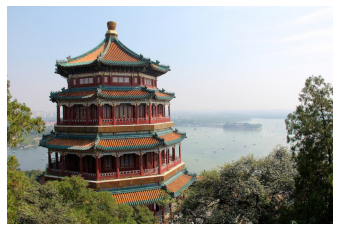

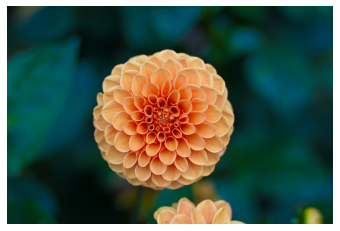

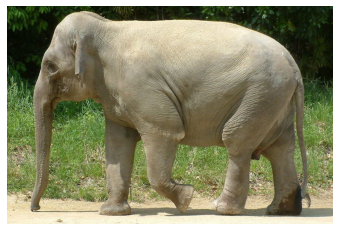

In [2]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
elephant = imread("elephant.jpg") 
print(elephant.shape)
images = np.array([china, flower, elephant])

batch_size, height, width, channels = images.shape
print(images.shape)

plt.imshow(images[0, :, :, :])
plt.axis("off") 
plt.show()

plt.imshow(images[1, :, :, :]) 
plt.axis("off") 
plt.show()

plt.imshow(images[2, :, :, :]) 
plt.axis("off") 
plt.show()

### 1.3 Laad pre-trained model

zie https://keras.io/api/applications/

In [46]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [55]:
def show_images(images_resized, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title)

    axes[0].imshow(images_resized[0, :, :, :]/255)
    axes[1].imshow(images_resized[1, :, :, :]/255)
    axes[2].imshow(images_resized[2, :, :, :]/255)

    axes[0].axis("off") 
    axes[1].axis("off") 
    axes[2].axis("off") 

    plt.tight_layout()
    plt.show()

def classify(image_type):

    inputs = keras.applications.resnet50.preprocess_input(image_type)

    Y_proba = model.predict(inputs, steps=1)

    top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)

    for image_index in range(len(images)):
        print("Image #{}".format(image_index))
        for class_id, name, y_proba in top_K[image_index]:
            print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
        print()

### 1.4 Resizing

#### Normal Resizing

wijzig formaat

In [49]:
images_resized = tf.image.resize(images, [224, 224])

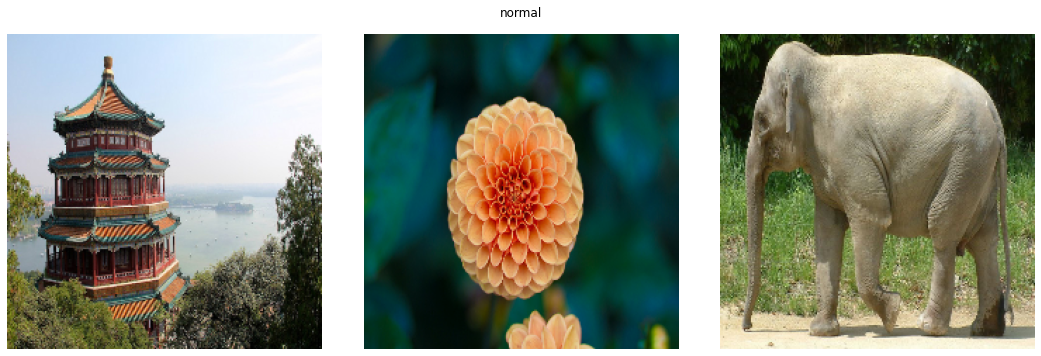

In [56]:
show_images(images_resized, 'normal')

Bepaal classificatie met Resnet50

In [57]:
classify(images_resized)

2022-04-30 16:11:13.006548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%
  n02980441 - castle       3.16%
  n03028079 - church       1.00%

Image #1
  n03530642 - honeycomb    49.81%
  n13040303 - stinkhorn    33.96%
  n02206856 - bee          4.35%
  n11939491 - daisy        3.23%
  n12985857 - coral_fungus 2.66%

Image #2
  n02504013 - Indian_elephant 82.06%
  n02504458 - African_elephant 10.24%
  n01871265 - tusker       7.68%
  n01704323 - triceratops  0.01%
  n02408429 - water_buffalo 0.00%



<p style="color:#F64C72">Insights</p>

- De model ziet de diasy nog als daisy voor 3%
- De olifant wordt goed geclassificeerd.

#### Resize with Pad

wijzig formaat

In [65]:
images_resized = tf.image.resize_with_pad(images, 224, 224)

Bepaal classificatie met ResNet50

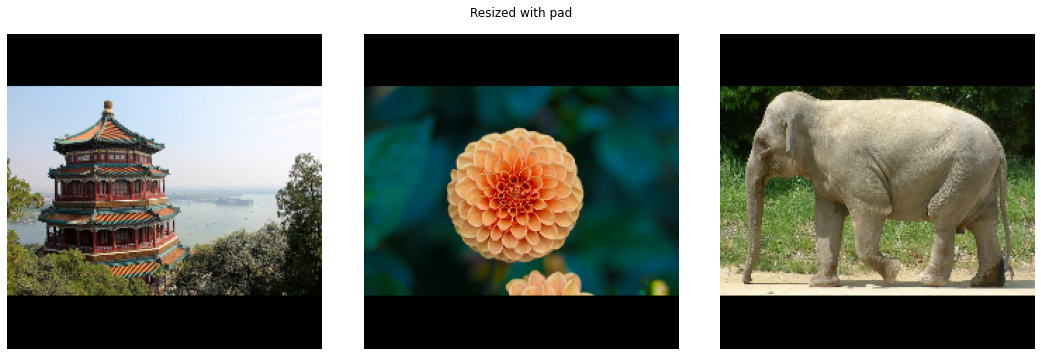

In [66]:
show_images(images_resized, 'Resized with pad')

Bepaal classificatie met Resnet50

In [60]:
classify(images_resized)

Image #0
  n03028079 - church       23.95%
  n02825657 - bell_cote    18.98%
  n04346328 - stupa        10.08%
  n03781244 - monastery    9.70%
  n02980441 - castle       7.51%

Image #1
  n03530642 - honeycomb    37.25%
  n11939491 - daisy        12.07%
  n04522168 - vase         9.74%
  n09229709 - bubble       4.29%
  n07930864 - cup          3.45%

Image #2
  n02504013 - Indian_elephant 93.05%
  n02504458 - African_elephant 3.76%
  n01871265 - tusker       3.02%
  n01704323 - triceratops  0.08%
  n02134084 - ice_bear     0.02%



<p style="color:#F64C72">Insights</p>

- De daisy wordt nog steeds voor 12% goed geclasificeerd. Het ziet het wel nog als honeycomb.
- Alleen de laatste image wordt goed geclassificeerd. 

#### Resize with pad or crop

wijzig formaat

In [61]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)

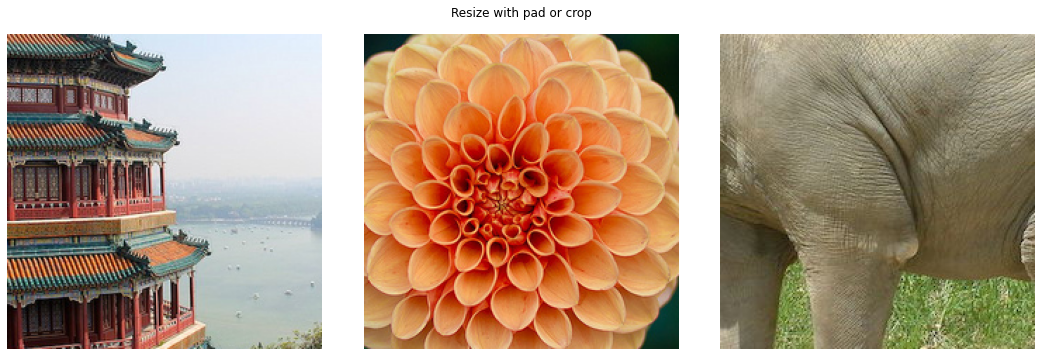

In [62]:
show_images(images_resized, 'Resize with pad or crop')

Bepaal classificatie met Resnet50

In [63]:
classify(images_resized)

2022-04-30 16:11:25.857654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Image #0
  n04243546 - slot         18.70%
  n03240683 - drilling_platform 11.68%
  n04149813 - scoreboard   11.32%
  n02825657 - bell_cote    6.53%
  n02966193 - carousel     5.01%

Image #1
  n03938244 - pillow       22.95%
  n02776631 - bakery       11.18%
  n07614500 - ice_cream    7.07%
  n07734744 - mushroom     5.06%
  n11939491 - daisy        4.87%

Image #2
  n04589890 - window_screen 74.15%
  n03447721 - gong         4.35%
  n09229709 - bubble       3.26%
  n04275548 - spider_web   3.04%
  n04332243 - strainer     2.59%



<p style="color:#F64C72">Insights</p>

- Geen van de afbeeldingen komen in de classificatie terecht. Zo ziet het niet eens dat een olifant een olifant is.

<mark>**OPDRACHT**:</mark> wat is de invloed van de verschillende manieren van "resizen" op de classificatie?

Met resize_with_pad_or_crop wordt er heel erg ingezoomed. De classificatie is hierbij wel het slechtst. De meeste images komen niet in de top 5 classifications. Bij het classificeren deed het het resizen met padding het ietsjes beter dan normaal resizen. Bij padding resizen wordt de aspect ratio behouden en zo nodig met 0 bijgevuld.
 

## 2. Transfer Learning

Transfer learning is het gebruik maken van een pre-trained model op verschillende problemen. De model geeft zijn informatie (weights en biases) over aan model 2. Deze kan weer gebruikt worden voor een ander dataset/probleem. In Keras applications zijn er heel veel pretrained modellen die je kunt gebruiken. In dit verslag maken we gebruik van de pretrained RestNet-50 model. 

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras import Input
import os

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
resnet_input = Input(shape=(32,32,3))

resnet_model = keras.applications.resnet50.ResNet50(weights="imagenet", input_tensor=resnet_input, include_top=False)

for layer in resnet_model.layers:
        layer.trainable=False

In [23]:
model = Sequential()

model.add(resnet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                      

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


2022-05-16 01:35:28.391678: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 01:35:29.490509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 1.5896 - accuracy: 0.4466

2022-05-16 01:36:11.458278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 47s 32ms/step - loss: 1.5896 - accuracy: 0.4466 - val_loss: 1.1888 - val_accuracy: 0.5876
Epoch 2/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.2927 - accuracy: 0.5528 - val_loss: 1.1507 - val_accuracy: 0.6042
Epoch 3/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.2117 - accuracy: 0.5801 - val_loss: 1.1231 - val_accuracy: 0.6150
Epoch 4/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.1578 - accuracy: 0.5999 - val_loss: 1.1051 - val_accuracy: 0.6202
Epoch 5/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.1161 - accuracy: 0.6147 - val_loss: 1.1001 - val_accuracy: 0.6254
Epoch 6/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.0762 - accuracy: 0.6274 - val_loss: 1.0758 - val_accuracy: 0.6340
Epoch 7/10
1407/1407 [==============================] - 44s 32ms/step - loss: 1.0442 - accuracy: 0.6380 - val_loss: 1.0800 - val_accura

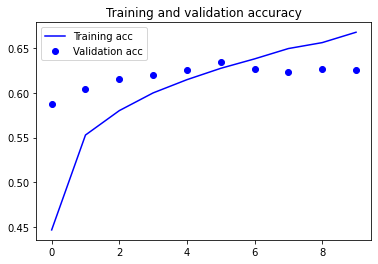

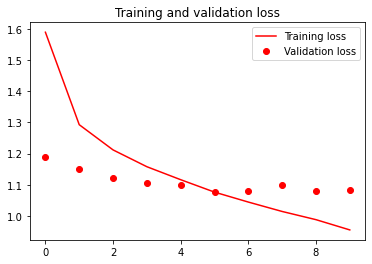

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.1090 - accuracy: 0.6215


[1.1089601516723633, 0.6215000152587891]